In [1]:
import sys
sys.path.append("../../galaxy_computer_vision_with_EFIGI_data/")
from galaxyquest.utilities import get_metrics_by_epoch

Labels:

0: Elliptical

1: Lenticular

2: Spiral

3: Irregular

4: Dwarf Spheroid Elliptical

In [2]:
import pickle
with open("../model_data/galaxy_alexnet_thresholded_eval.p", "rb") as f:
    eval_data = pickle.load(f)

epoch_predictions = eval_data["predicted_labels"]
epoch_labels = eval_data["ground_truth_labels"]
epoch_metrics = get_metrics_by_epoch(epoch_predictions, epoch_labels)

label_names=["elliptical", "lenticular", "spiral"," irregular", "dwarf_elliptical"]

../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:44: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\evaluation_methods.py:40: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)
../../galaxy_computer_vision_with_EFIGI_data\galaxyquest\utilities\e

In [3]:
[key for key in eval_data]

['epoch_acc',
 'epoch_loss',
 'predicted_labels',
 'prediction_probabilities',
 'ground_truth_labels',
 'pgc_ids']

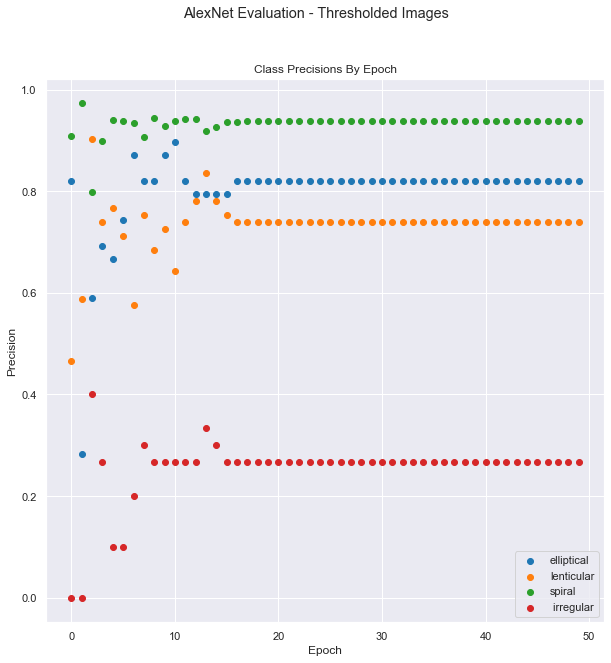

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set_palette(sns.color_palette("tab10"))
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('AlexNet Evaluation - Thresholded Images')
ax.set_title("Class Precisions By Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Precision")
for label in range(len(epoch_metrics["epoch_precisions"])):
    num_epochs = range(len(epoch_metrics["epoch_precisions"][label]))
    precisions = epoch_metrics["epoch_precisions"][label]
    df = pd.DataFrame(data={"x": num_epochs, "y": precisions})
    plt.scatter(num_epochs, precisions, label=label_names[label])

ax.legend()


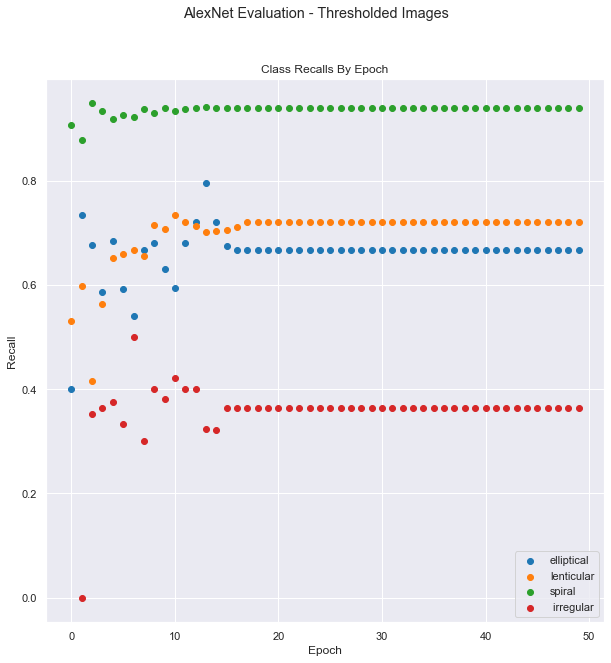

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set_palette(sns.color_palette("tab10"))
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('AlexNet Evaluation - Thresholded Images')
ax.set_title("Class Recalls By Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Recall")
for label in range(len(epoch_metrics["epoch_recalls"])):
    num_epochs = range(len(epoch_metrics["epoch_recalls"][label]))
    precisions = epoch_metrics["epoch_recalls"][label]
    df = pd.DataFrame(data={"x": num_epochs, "y": precisions})
    plt.scatter(num_epochs, precisions, label=label_names[label])

ax.legend()


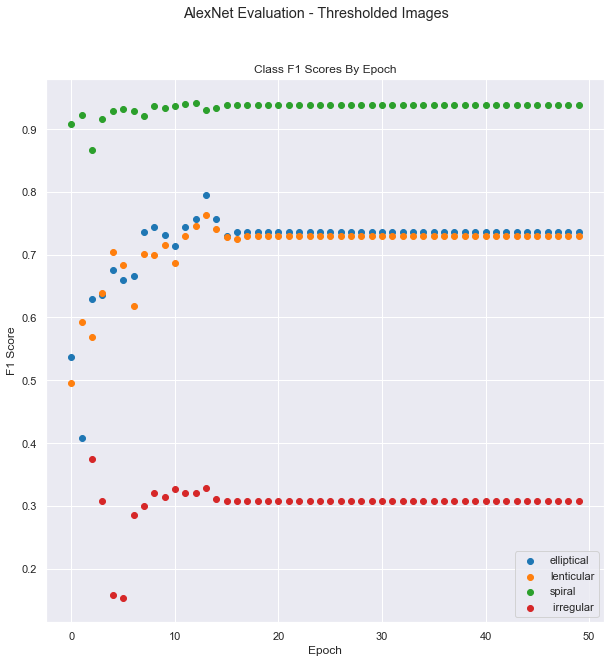

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set_palette(sns.color_palette("tab10"))
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('AlexNet Evaluation - Thresholded Images')
ax.set_title("Class F1 Scores By Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("F1 Score")
for label in range(len(epoch_metrics["epoch_f1"])):
    num_epochs = range(len(epoch_metrics["epoch_f1"][label]))
    precisions = epoch_metrics["epoch_f1"][label]
    df = pd.DataFrame(data={"x": num_epochs, "y": precisions})
    plt.scatter(num_epochs, precisions, label=label_names[label])

ax.legend()


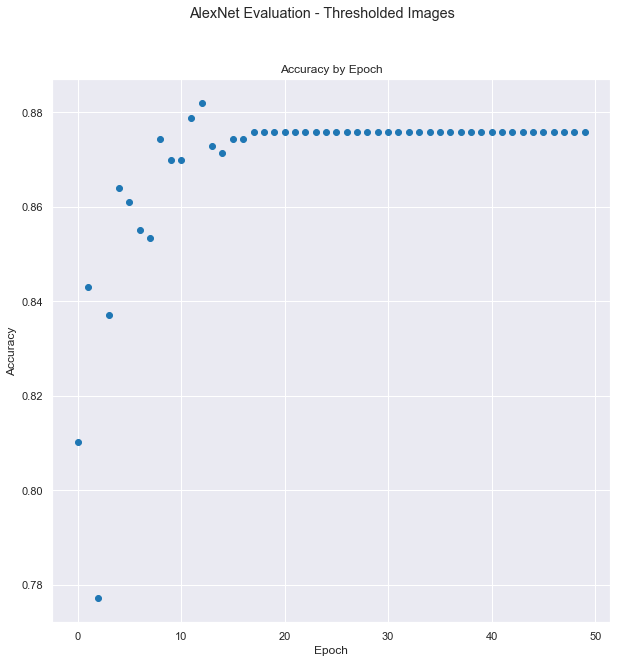

In [42]:
sns.set_palette(sns.color_palette("tab10"))
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('AlexNet Evaluation - Thresholded Images')
ax.set_title("Accuracy by Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
num_epochs = range(len(eval_data["epoch_acc"]))
plt.scatter(num_epochs, eval_data["epoch_acc"])

In [43]:
import matplotlib.pyplot as plt
def plot_metric_byclass(epoch_metrics, metric, labels):

    fig, ax = plt.subplots(figsize=(10, 10))
    fig.suptitle('AlexNet Evaluation - Thresholded Images')
    ax.set_title("Final " + metric + " by class")
    ax.set_xlabel("Class")
    ax.set_ylabel("Accuracy")

    metric_list = []

    for i in range(len(epoch_metrics["epoch_" + metric])):
        metric_list.append(epoch_metrics["epoch_" + metric][i][-1])

    x_locs = range(len(metric_list))
    for i,  v in enumerate(metric_list):
        plt.text(x_locs[i] - 0.12, v + 0.01, "{:.2f}".format(v))

    
    plt.bar(x_locs, metric_list)
    plt.xticks(x_locs, labels)



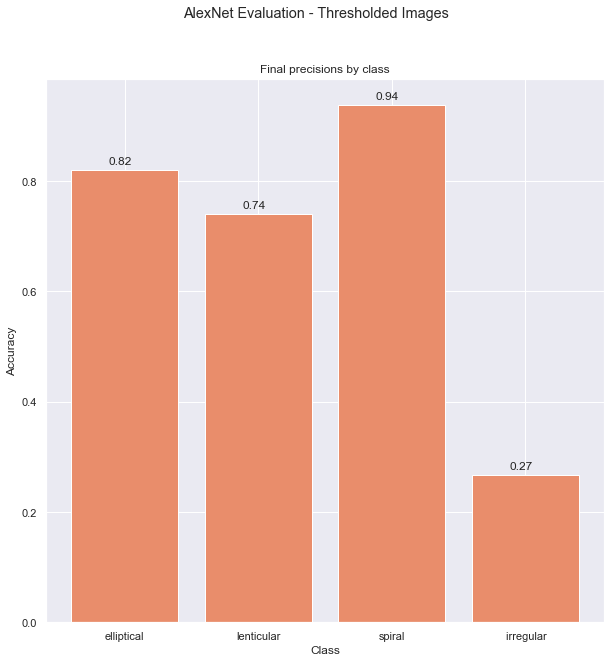

In [44]:
sns.set_palette(sns.color_palette("flare"))
labels = ["elliptical", "lenticular", "spiral"," irregular"]
plot_metric_byclass(epoch_metrics, "precisions", labels)

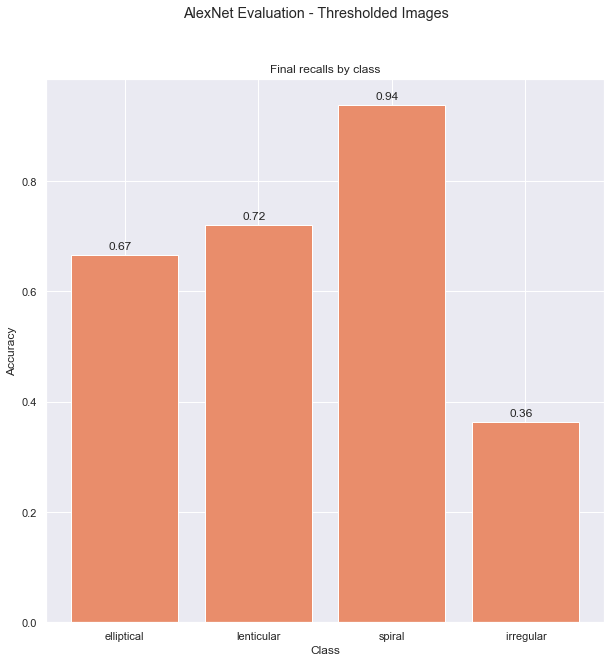

In [45]:
plot_metric_byclass(epoch_metrics, "recalls", labels)

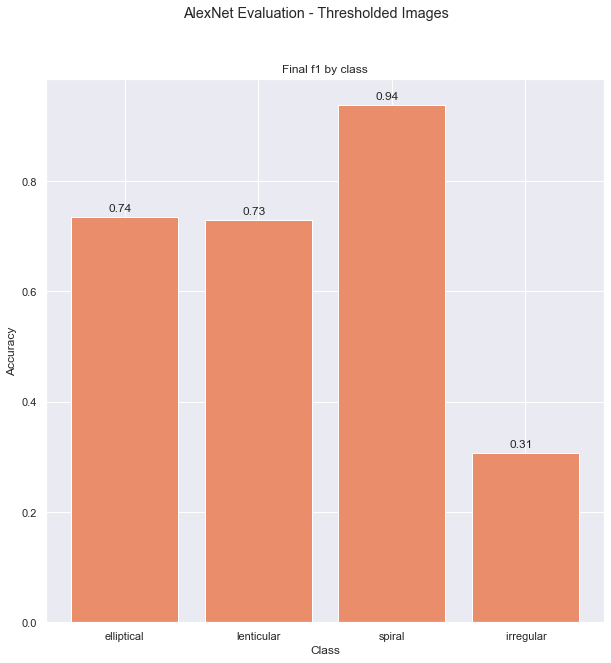

In [46]:
plot_metric_byclass(epoch_metrics, "f1", labels)

In [47]:
# Show final accuracy
eval_data["epoch_acc"][-1]

0.8759342301943199

## Overall accuracy of AlexNet model on thresholded data:
## 87.6%